In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_validate,train_test_split,ShuffleSplit,GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_validate,ShuffleSplit
from sklearn.svm import SVC

In [2]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    return summ
# A function that gives us information about data

In [5]:
summary(train).style.background_gradient(cmap='Set3_r')

data shape: (891, 12)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
PassengerId,int64,0,0.000000,891,1.000000,891.000000,446.000000,257.353842,1,2,3
Survived,int64,0,0.000000,2,0.000000,1.000000,0.383838,0.486592,0,1,1
Pclass,int64,0,0.000000,3,1.000000,3.000000,2.308642,0.836071,3,1,3
Name,object,0,0.000000,891,nan,nan,nan,nan,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Heikkinen, Miss. Laina"
Sex,object,0,0.000000,2,nan,nan,nan,nan,male,female,female
Age,float64,177,19.865320,88,0.420000,80.000000,29.699118,14.526497,22.000000,38.000000,26.000000
SibSp,int64,0,0.000000,7,0.000000,8.000000,0.523008,1.102743,1,1,0
Parch,int64,0,0.000000,7,0.000000,6.000000,0.381594,0.806057,0,0,0
Ticket,object,0,0.000000,681,nan,nan,nan,nan,A/5 21171,PC 17599,STON/O2. 3101282
Fare,float64,0,0.000000,248,0.000000,512.329200,32.204208,49.693429,7.250000,71.283300,7.925000


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
def chart(f):
    Survived = train[train['Survived']==1][f].value_counts()
    Deceased = train[train["Survived"]==0][f].value_counts()
    df=pd.DataFrame([Survived,Deceased])
    df.index = ["Survived","Deceased"]
    df.plot(kind = 'bar',stacked=True,figsize = (5,5))
# This function takes a column of data and plots the death rate in that column

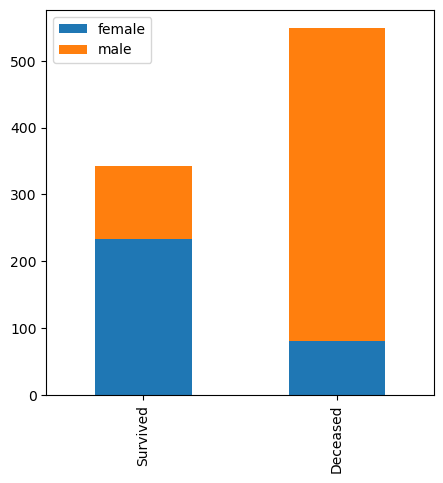

In [11]:
chart("Sex")

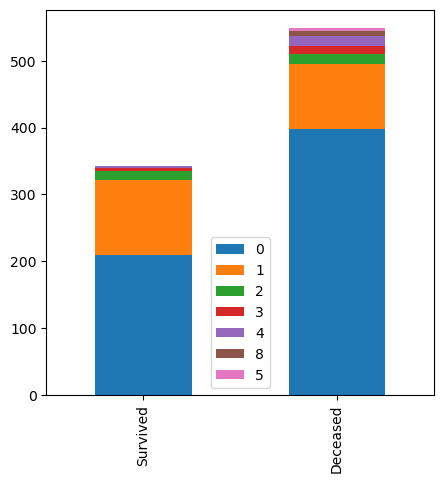

In [12]:
chart("SibSp")

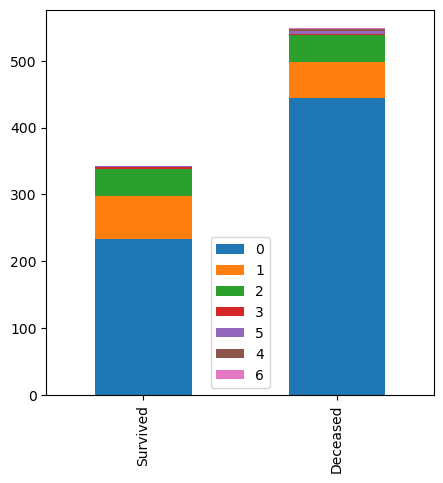

In [13]:
chart("Parch")

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
baga_rafta:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


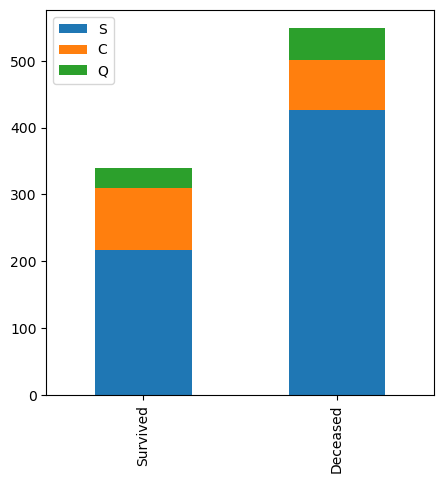

In [14]:
chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("baga_rafta:\n",train[train['Survived']==0]['Embarked'].value_counts())


In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
Survived =  train["Survived"]
train.drop(["Survived"],axis = 1,inplace=True)
train
# We separated the label and then removed the label column from the data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,male,26.0,0,0,111369,30.0000,C148,C


In [19]:
data_number_train = train.select_dtypes(["int64","float64"])
data_category_train = train.select_dtypes("object")
# We separated the numerical data and then we separated the non-numerical data as well

In [20]:
data_number_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [21]:
data_category_train

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S
...,...,...,...,...
886,male,211536,NaN,S
887,female,112053,B42,S
888,female,W./C. 6607,NaN,S
889,male,111369,C148,C


In [22]:
data_category_train.drop(columns=['Ticket','Cabin'],inplace=True)
data_category_train.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [23]:
data_category_train

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [24]:
data_category_train.nunique()

Sex         2
Embarked    3
dtype: int64

# Categorical
## داده های غیر عددی

In [25]:
label_cat = LabelEncoder()
# data_category_train = data_category_train.apply(labla_cat.fit_transform)
data_category_train['Sex'] = label_cat.fit_transform(data_category_train['Sex'])

In [26]:
data_category_train

,Sex,Embarked
0,1,S
1,0,C
2,0,S
3,0,S
4,1,S
...,...,...
886,1,S
887,0,S
888,0,S
889,1,C


# از اینجا به بعدش برای داده های غیر عددی کاراشو شما انجام بدید بعدش من بیام روی داده های نان کار کنم 

In [27]:
data_category_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
def random_em():
    return np.random.choice(['S','C','Q'])

In [29]:
data_category_train['Embarked'][data_category_train['Embarked'].isna()] = np.asarray([random_em(),random_em()])

/tmp/ipykernel_20/3400019879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_category_train['Embarked'][data_category_train['Embarked'].isna()] = np.asarray([random_em(),random_em()])


In [30]:
data_category_train

,Sex,Embarked
0,1,S
1,0,C
2,0,S
3,0,S
4,1,S
...,...,...
886,1,S
887,0,S
888,0,S
889,1,C


In [31]:
from sklearn.preprocessing import OneHotEncoder
onehot= OneHotEncoder()
Em_df= pd.DataFrame(onehot.fit_transform(np.asarray(data_category_train['Embarked']).reshape(-1,1)).toarray(),
                    columns=['Embarked0','Embarked1','Embarked2'])

In [32]:
data_category_train

,Sex,Embarked
0,1,S
1,0,C
2,0,S
3,0,S
4,1,S
...,...,...
886,1,S
887,0,S
888,0,S
889,1,C


In [33]:
data_category_train.drop(columns=['Embarked'])

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
data_category_train.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [35]:
temp_data= pd.concat([data_category_train.drop(columns=['Embarked']),Em_df,data_number_train],axis=1)
temp_data

,Sex,Embarked0,Embarked1,Embarked2,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,0.0,1.0,1,3,22.0,1,0,7.2500
1,0,1.0,0.0,0.0,2,1,38.0,1,0,71.2833
2,0,0.0,0.0,1.0,3,3,26.0,0,0,7.9250
3,0,0.0,0.0,1.0,4,1,35.0,1,0,53.1000
4,1,0.0,0.0,1.0,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,1,0.0,0.0,1.0,887,2,27.0,0,0,13.0000
887,0,0.0,0.0,1.0,888,1,19.0,0,0,30.0000
888,0,0.0,0.0,1.0,889,3,NaN,1,2,23.4500
889,1,1.0,0.0,0.0,890,1,26.0,0,0,30.0000


In [36]:
temp_data.isna().sum()

Sex              0
Embarked0        0
Embarked1        0
Embarked2        0
PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [37]:
from sklearn.impute import KNNImputer
knnImp = KNNImputer()
temp_data_filledna = pd.DataFrame(knnImp.fit_transform(temp_data),columns=temp_data.columns)

In [38]:
temp_data_filledna.isna().sum()

Sex            0
Embarked0      0
Embarked1      0
Embarked2      0
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [39]:
train_data=  temp_data_filledna

In [40]:
train_data.head()

,Sex,Embarked0,Embarked1,Embarked2,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,0.0,1.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,0.0,1.0,0.0,0.0,2.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,0.0,1.0,3.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,1.0,4.0,1.0,35.0,1.0,0.0,53.1000
4,1.0,0.0,0.0,1.0,5.0,3.0,35.0,0.0,0.0,8.0500


# scale

In [41]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
pd.DataFrame(train_data).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.000000,1.0,0.271174,0.125,0.0,0.014151
1,0.0,1.0,0.0,0.0,0.001124,0.0,0.472229,0.125,0.0,0.139136
2,0.0,0.0,0.0,1.0,0.002247,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.0,0.0,1.0,0.003371,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.0,0.0,1.0,0.004494,1.0,0.434531,0.000,0.0,0.015713


In [42]:
X_train,X_test,y_train,y_test = train_test_split(train_data,Survived,test_size=0.3)

# Data Test

In [43]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
data_number_tese = test.select_dtypes(["int64","float64"])
data_category_test = test.select_dtypes("object")

In [45]:
data_category_test.drop(columns=['Ticket','Cabin'],inplace=True)
data_category_test.head()

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [46]:
data_category_test.head(5)

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [47]:
data_number_tese.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [48]:
data_category_test.nunique()

Sex         2
Embarked    3
dtype: int64

In [49]:
label_cat = LabelEncoder()
data_category_test['Sex'] = label_cat.fit_transform(data_category_test['Sex'])

In [50]:
data_category_test

,Sex,Embarked
0,1,Q
1,0,S
2,1,Q
3,1,S
4,0,S
...,...,...
413,1,S
414,0,C
415,1,S
416,1,S


In [51]:
data_category_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [52]:
def random_em_test():
    return np.random.choice(['S','C','Q'])

In [53]:
data_category_test['Embarked'][data_category_test['Embarked'].isna()] = np.asarray([random_em_test(),random_em_test()])


/tmp/ipykernel_20/31364498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_category_test['Embarked'][data_category_test['Embarked'].isna()] = np.asarray([random_em_test(),random_em_test()])


In [54]:
data_category_test

,Sex,Embarked
0,1,Q
1,0,S
2,1,Q
3,1,S
4,0,S
...,...,...
413,1,S
414,0,C
415,1,S
416,1,S


In [55]:

onehot_test= OneHotEncoder()
Em_df_test= pd.DataFrame(onehot_test.fit_transform(np.asarray(data_category_test['Embarked']).reshape(-1,1)).toarray(),
                    columns=['Embarked0','Embarked1','Embarked2'])

In [56]:
data_category_test

,Sex,Embarked
0,1,Q
1,0,S
2,1,Q
3,1,S
4,0,S
...,...,...
413,1,S
414,0,C
415,1,S
416,1,S


In [57]:
data_category_test.drop(columns=['Embarked'])

,Sex
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [58]:
Em_df_test

,Embarked0,Embarked1,Embarked2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
413,0.0,0.0,1.0
414,1.0,0.0,0.0
415,0.0,0.0,1.0
416,0.0,0.0,1.0


In [59]:
data_category_test.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [60]:
temp_data_test= pd.concat([data_category_test.drop(columns=['Embarked']),Em_df_test,data_number_tese],axis=1)
temp_data_test

,Sex,Embarked0,Embarked1,Embarked2,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,1.0,0.0,892,3,34.5,0,0,7.8292
1,0,0.0,0.0,1.0,893,3,47.0,1,0,7.0000
2,1,0.0,1.0,0.0,894,2,62.0,0,0,9.6875
3,1,0.0,0.0,1.0,895,3,27.0,0,0,8.6625
4,0,0.0,0.0,1.0,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,1,0.0,0.0,1.0,1305,3,NaN,0,0,8.0500
414,0,1.0,0.0,0.0,1306,1,39.0,0,0,108.9000
415,1,0.0,0.0,1.0,1307,3,38.5,0,0,7.2500
416,1,0.0,0.0,1.0,1308,3,NaN,0,0,8.0500


In [61]:
temp_data_test.isna().sum()

Sex             0
Embarked0       0
Embarked1       0
Embarked2       0
PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [62]:

knnImp_test = KNNImputer()
temp_data_test_filledna = pd.DataFrame(knnImp.fit_transform(temp_data_test),columns=temp_data_test.columns)

In [63]:
temp_data_test_filledna.isna().sum()

Sex            0
Embarked0      0
Embarked1      0
Embarked2      0
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [64]:
test_data=  temp_data_test_filledna

In [65]:
test_data.head()

,Sex,Embarked0,Embarked1,Embarked2,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,0.0,892.0,3.0,34.5,0.0,0.0,7.8292
1,0.0,0.0,0.0,1.0,893.0,3.0,47.0,1.0,0.0,7.0000
2,1.0,0.0,1.0,0.0,894.0,2.0,62.0,0.0,0.0,9.6875
3,1.0,0.0,0.0,1.0,895.0,3.0,27.0,0.0,0.0,8.6625
4,0.0,0.0,0.0,1.0,896.0,3.0,22.0,1.0,1.0,12.2875


In [66]:
scaler_test = MinMaxScaler()
test_data = scaler.fit_transform(test_data)
pd.DataFrame(test_data).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.000000,1.0,0.452723,0.000,0.000000,0.015282
1,0.0,0.0,0.0,1.0,0.002398,1.0,0.617566,0.125,0.000000,0.013663
2,1.0,0.0,1.0,0.0,0.004796,0.5,0.815377,0.000,0.000000,0.018909
3,1.0,0.0,0.0,1.0,0.007194,1.0,0.353818,0.000,0.000000,0.016908
4,0.0,0.0,0.0,1.0,0.009592,1.0,0.287881,0.125,0.111111,0.023984


In [67]:
pd.DataFrame(test_data)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.000000,1.0,0.452723,0.000,0.000000,0.015282
1,0.0,0.0,0.0,1.0,0.002398,1.0,0.617566,0.125,0.000000,0.013663
2,1.0,0.0,1.0,0.0,0.004796,0.5,0.815377,0.000,0.000000,0.018909
3,1.0,0.0,0.0,1.0,0.007194,1.0,0.353818,0.000,0.000000,0.016908
4,0.0,0.0,0.0,1.0,0.009592,1.0,0.287881,0.125,0.111111,0.023984
...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.0,0.0,1.0,0.990408,1.0,0.294474,0.000,0.000000,0.015713
414,0.0,1.0,0.0,0.0,0.992806,0.0,0.512066,0.000,0.000000,0.212559
415,1.0,0.0,0.0,1.0,0.995204,1.0,0.505473,0.000,0.000000,0.014151
416,1.0,0.0,0.0,1.0,0.997602,1.0,0.294474,0.000,0.000000,0.015713


In [68]:
gender_submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
gender_submission.drop(columns=['PassengerId'],inplace=True)

scaler_test_gender_submission = MinMaxScaler()
test_data_g_s = scaler.fit_transform(gender_submission)
gender_submission

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [70]:
knn_fil = KNeighborsClassifier()
params = {
    'n_neighbors': range(1,63,1),
    'p': range(2,20),
    'weights': ['uniform', 'distance']
    }
cv = ShuffleSplit(n_splits=4, test_size=0.25,random_state = 1)
clf_fil = RandomizedSearchCV(knn_fil,param_distributions=params, scoring = "accuracy",
cv = cv,verbose = 1,return_train_score = True,refit = True,n_iter=20)

In [71]:
clf_fil.fit(train_data,Survived)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=4, random_state=1, test_size=0.25, train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 63),
                                        'p': range(2, 20),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [72]:
clf_fil.best_params_

{'weights': 'uniform', 'p': 3, 'n_neighbors': 33}

In [73]:
clf_fil.score(test_data,test_data_g_s)
# test data acc

0.9066985645933014

In [74]:
clf_fil.score(train_data,Survived)
# train data acc

0.8103254769921436

In [75]:
knn_fil_ = KNeighborsClassifier(n_neighbors=3,p=2,weights="uniform")

In [76]:
knn_fil_.fit(train_data,Survived)

y_pred = knn_fil_.predict(test_data)
print("test",accuracy_score(test_data_g_s,y_pred))

y_pred_train = knn_fil_.predict(train_data)
print("train",accuracy_score(Survived,y_pred_train))

test 0.868421052631579
train 0.8810325476992144


In [77]:
svm_grad_sarch  = SVC()
C = np.arange(17,18,0.1)
gamma = np.logspace(-3,3,7)
degree = np.arange(1,10,1)
params = {
        "C" : C,
    "kernel" :["rbf"],
    "degree" : degree
    }
cv = ShuffleSplit(n_splits=5, test_size=0.25,random_state = 1)
clf_grid = GridSearchCV(svm_grad_sarch,param_grid=params, scoring = "accuracy",
cv = cv,verbose = 1,return_train_score = True,refit = True)

In [78]:
clf_grid.fit(train_data,Survived)
clf_grid.best_params_


Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'C': 17.200000000000003, 'degree': 1, 'kernel': 'rbf'}

In [79]:
clf_grid.score(train_data,Survived)

0.8383838383838383

In [80]:
clf_grid.score(test_data,test_data_g_s)

0.8827751196172249